In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import math
from collections import defaultdict

# Loading random data with uniform distribution

In [2]:
values_list = []  

with open('datos_aleatorios.txt', 'r') as archive:
    for linea in archive:
        value = float(linea.strip())
        values_list.append(value)  

# Function declaration

In [3]:
# Function to plot the histogram
def histograma(lista_datos, title, num_bins=10, alpha=0.8, width=0.5):
    fig, ax = plt.subplots()
    ax.hist(lista_datos, num_bins, edgecolor='black', alpha=alpha, width=width)
    ax.set_xlabel('número')
    ax.set_ylabel('Frecuencia')
    ax.set_title(title)
    plt.show()

In [4]:

def calcular_distancia_entre_puntos(x,y):
    distancias = []
    
    for i in range(len(x)-1):
        x1 = x[i]
        y1 = y[i]
        x2 = x[i+1]
        y2 = y[i+1]
        distancia = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
        distancias.append(distancia)
    
    return distancias

In [5]:
def randomwalk2D(n, maximum_value, start_point):
    # Mesh to later modify the visited boxes with 1's
    grid = np.zeros((round(maximum_value)+1,round(maximum_value)+1))
    # List to save random walker coordinates
    x = np.zeros(n)
    y = np.zeros(n)
    # List of lengths to choose randomly
    divisiones = round(1000.0 / 30)
    lengths = [i for i in range(divisiones)]
    # Definition  of starting points
    x[0] = start_point[0]
    y[0] = start_point[1]
    # List of directions to choose randomly
    directions = ["N", "NO", "NE", "S", "SE", "SO", "O", "E"]
    directions_list = []
    # Edge counting variables
    greater_to_the_edge = 0
    touching_the_edge = []

    for i in range(1, n):
        without_movement = True
        # Loop to ensure that the coordinate is within the valid area
        while without_movement:
            # Pick a direction an length at random
            direction = random.choice(directions)
            length = random.choice(lengths)
            # Move the object according to the direction
            if direction == "E":
                directions_list.append('E')
                if x[i - 1] + length <= maximum_value:
                    # Lower the flag to indicate that the move is valid
                    without_movement = False
                    # Save the new movement
                    x[i] = x[i - 1] + length
                    y[i] = y[i - 1] 
                    # Save the visited place
                    grid[round(x[i]), round(y[i])] = 1
            elif direction == "O":
                directions_list.append('O')
                if x[i - 1] - length >= 0:
                    without_movement = False
                    x[i] = x[i - 1] - length
                    y[i] = y[i - 1] 
                    grid[round(x[i]), round(y[i])] = 1
            elif direction == "N":
                directions_list.append('N')
                if y[i - 1] + length <= maximum_value:
                    without_movement = False
                    x[i] = x[i - 1] 
                    y[i] = y[i - 1] + length
                    grid[round(x[i]), round(y[i])] = 1
            elif direction == "S":
                directions_list.append('S')
                if y[i - 1] - length >= 0:
                    without_movement = False
                    x[i] = x[i - 1] 
                    y[i] = y[i - 1] - length
                    grid[round(x[i]), round(y[i])] = 1
            if direction == "NE":
                directions_list.append('NE')
                if x[i - 1] + length <= maximum_value and y[i - 1] + length <= maximum_value:
                    without_movement = False
                    x[i] = x[i - 1] + length
                    y[i] = y[i - 1] + length
                    grid[round(x[i]), round(y[i])] = 1
            elif direction == "NO":
                directions_list.append('NO')
                if x[i - 1] - length >= 0 and y[i - 1] + length <= maximum_value:
                    without_movement = False
                    x[i] = x[i - 1] - length
                    y[i] = y[i - 1] + length
                    grid[round(x[i]), round(y[i])] = 1
            elif direction == "SE":
                directions_list.append('SE')
                if x[i - 1] + length <= maximum_value and y[i - 1] - length >= 0:
                    without_movement = False
                    x[i] = x[i - 1] + length
                    y[i] = y[i - 1] - length
                    grid[round(x[i]), round(y[i])] = 1
            elif direction == "SO":
                directions_list.append('SO')
                if x[i - 1] - length >= 0 and y[i - 1] - length >= 0:
                    without_movement = False
                    x[i] = x[i - 1] - length
                    y[i] = y[i - 1] - length
                    grid[round(x[i]), round(y[i])] = 1
            
            greater_to_the_edge = greater_to_the_edge + 1
        if x[i] or y[i] == maximum_value:
            touching_the_edge.append((x[i],y[i]))

    return x, y, grid, directions_list, greater_to_the_edge, touching_the_edge 

# Random walk

Selection of starting points and generation of the random walk values

In [6]:
maximum_value = max(values_list)
Initial_point = [values_list[0], values_list[1]]
#Initial_point = [random.choice(values_list), random.choice(values_list)]
num_steps = 10000
x_data, y_data, grid, directions, greater_to_the_edge, touching_the_edge = randomwalk2D(num_steps, maximum_value, Initial_point)

# Measurements

In [7]:
visited_area =sum(sum(grid)) *100.0 / (round(maximum_value) * round(maximum_value))
print("Visited Area Units", sum(sum(grid)))
print("Percentage of area visited", visited_area, "%")
distance_traveled = calcular_distancia_entre_puntos(x_data,y_data)
total_distance = sum(distance_traveled)
#print("Distancias")
#for i, distancia in enumerate(distance_traveled, start=1):
#    print(f"Segmento {i}: {distancia:.2f}")
print("Total distance traveled: ", total_distance)

print("Number of times outside the border (times to recalculate): ", greater_to_the_edge)
print("Number of times touching the edge: ", len(touching_the_edge))

unic_tuple = set()
oc = defaultdict(int)
# unique tuples are added to the set
for tupla in list(zip(x_data,y_data)):
    unic_tuple.add(tupla)
    # Counter
    oc[tupla] = oc[tupla]+1
num_unic_tuple = len(unic_tuple)
print(f"Number of times passed through places already visited: {num_steps - num_unic_tuple}")


Visited Area Units 9532.0
Percentage of area visited 0.9532 %
Total distance traveled:  192175.05396816973
Number of times outside the border (times to recalculate):  10152
Number of times touching the edge:  9999
Number of times passed through places already visited: 467


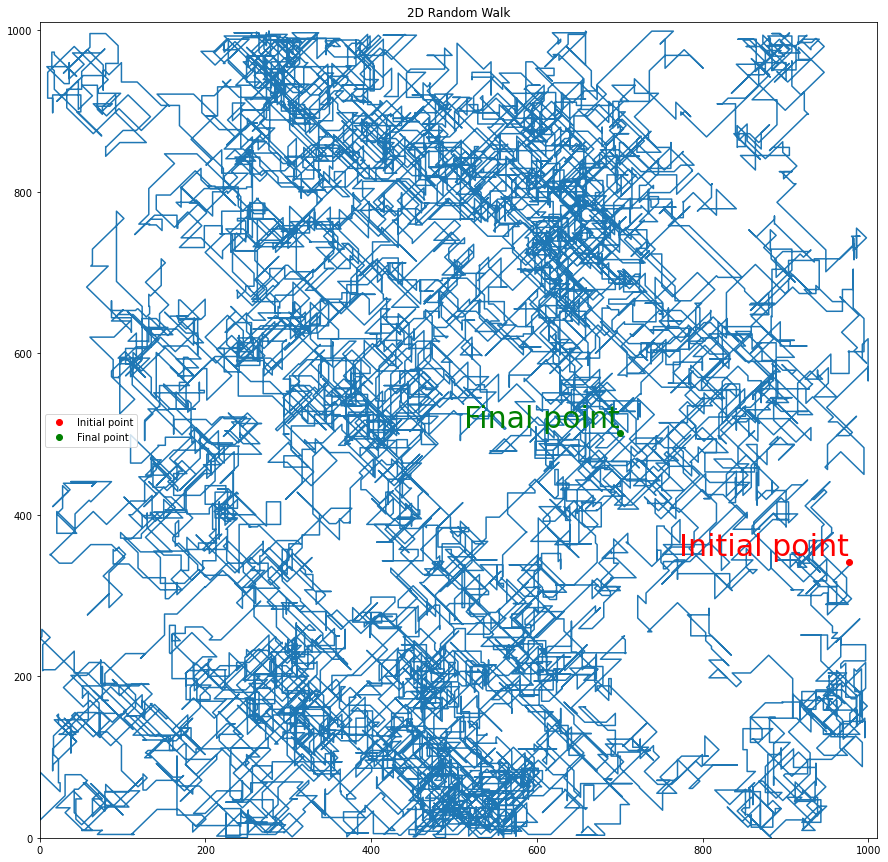

In [8]:
plt.figure(figsize=(15, 15))
plt.title("2D Random Walk")
plt.plot(x_data, y_data)
plt.plot(Initial_point[0], Initial_point[1], 'ro', label='Initial point')
plt.text(Initial_point[0], Initial_point[1], 'Initial point', color='red', fontsize=30, verticalalignment='bottom', horizontalalignment='right')
plt.plot(x_data[-1], y_data[-1], 'go', label='Final point')
plt.text(x_data[-1], y_data[-1], 'Final point', color='green', fontsize=30, verticalalignment='bottom', horizontalalignment='right')
plt.xlim(0, maximum_value+10) 
plt.ylim(0, maximum_value+10) 
plt.legend()
plt.show()

No handles with labels found to put in legend.


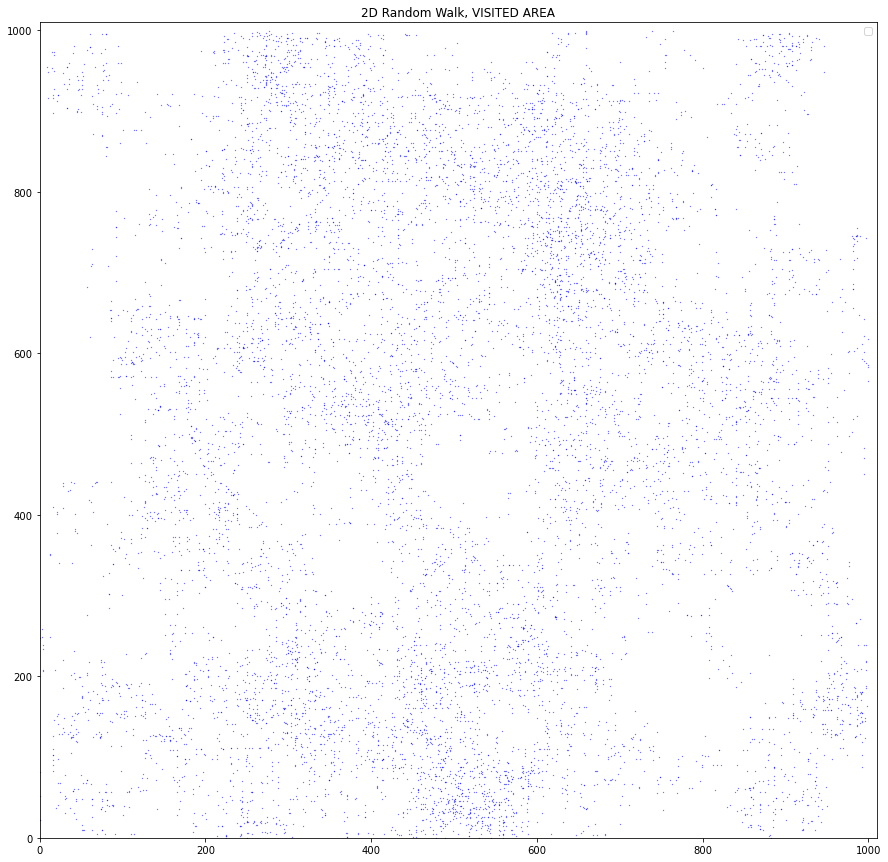

In [9]:
plt.figure(figsize=(15, 15))
plt.title("2D Random Walk, VISITED AREA")
plt.scatter(x_data, y_data, color='blue', marker='o', s=.05)
plt.xlim(0, maximum_value+10) 
plt.ylim(0, maximum_value+10) 
plt.legend()
plt.show()

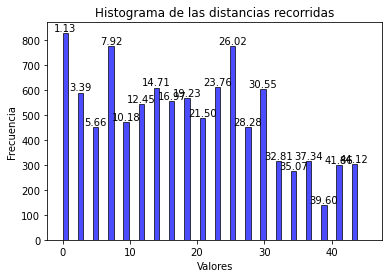

In [10]:
# Crear un histograma con espacio entre las barras
n, bins, patches = plt.hist(distance_traveled, bins=20, color='blue', edgecolor='black', alpha=0.7, width=0.8)

# Añadir etiquetas y título
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Histograma de las distancias recorridas')

# Añadir valores de frecuencia en las barras
for i in range(len(patches)):
    x_value = bins[i] + (bins[i+1] - bins[i]) / 2
    height = patches[i].get_height()
    if height > 0:
        #plt.text(patches[i].get_x() + patches[i].get_width() / 2, height, f'{int(height)}', ha='center', va='bottom')
        plt.text(patches[i].get_x() + patches[i].get_width() / 2, height, f'{x_value:.2f}', ha='center', va='bottom')

# Mostrar el gráfico
plt.show()

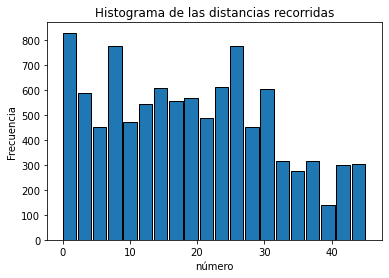

In [11]:
histograma(distance_traveled, "Histograma de las distancias recorridas", num_bins=20, alpha=1,width=2)

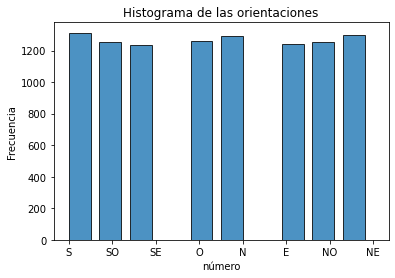

In [12]:
histograma(directions, "Histograma de las orientaciones")

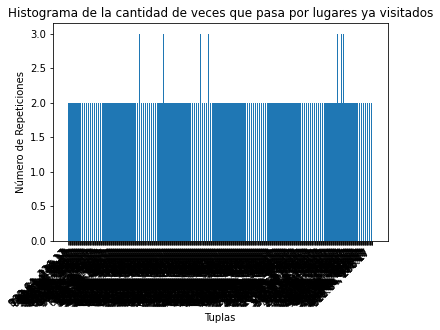

In [13]:
# Diccionario para realizar un seguimiento de las ocurrencias
ocurrencias = defaultdict(int)
lista_combinada = list(zip(x_data,y_data))
# Iterar sobre la lista combinada y contar las ocurrencias
for tupla in lista_combinada:
    ocurrencias[tupla] += 1

# Filtrar las tuplas que se repiten más de una vez
tuplas_repetidas = [(tupla, count) for tupla, count in ocurrencias.items() if count > 1]

# Separar las tuplas y sus ocurrencias
tuplas, ocurrencias = zip(*tuplas_repetidas)

# Crear un histograma de las ocurrencias
plt.bar(range(len(tuplas)), ocurrencias, tick_label=[f'{t[0]:.2f}, {t[1]:.2f}' for t in tuplas])

# Añadir etiquetas y título
plt.xlabel('Tuplas')
plt.ylabel('Número de Repeticiones')
plt.title('Histograma de la cantidad de veces que pasa por lugares ya visitados')

# Rotar las etiquetas para mayor claridad
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.show()

In [14]:
tuplas_repetidas

[((912.6397741696, 326.1651060665), 2),
 ((899.6397741696, 416.1651060665), 2),
 ((749.6397741696, 341.1651060665), 2),
 ((797.6397741696, 276.1651060665), 2),
 ((781.6397741696, 276.1651060665), 2),
 ((908.6397741696, 152.16510606650002), 2),
 ((983.6397741696, 125.16510606650002), 2),
 ((926.6397741696, 97.16510606650002), 2),
 ((869.6397741696, 11.165106066500016), 2),
 ((894.6397741696, 36.165106066500016), 2),
 ((855.6397741696, 61.165106066500016), 2),
 ((858.6397741696, 50.165106066500016), 2),
 ((935.6397741696, 70.16510606650002), 2),
 ((975.6397741696, 164.16510606650002), 2),
 ((992.6397741696, 181.16510606650002), 2),
 ((888.6397741696, 49.165106066500016), 2),
 ((857.6397741696, 149.16510606650002), 2),
 ((952.6397741696, 172.16510606650002), 2),
 ((966.6397741696, 248.16510606650002), 2),
 ((984.6397741696, 266.1651060665), 2),
 ((954.6397741696, 158.16510606650002), 2),
 ((956.6397741696, 254.16510606650002), 2),
 ((907.6397741696, 353.1651060665), 2),
 ((925.6397741696,